# Gun Ownership vs. Homicide rates among Countries in the Western Hemisphere

#### Comparing the rates of homicides and gun ownership for all countries in the western hemisphere (Americas) that have available data. Data sources and processing of the data is outlined in the notes and code below. This is an exploration of data that is mainly meant for fun and practice of cleaning/organizing data and displaying graphs.

Homicide data source: https://dataunodc.un.org/dp-intentional-homicide-victims 

Gun data source: https://worldpopulationreview.com/country-rankings/gun-ownership-by-country

In [2]:
# import tools and load data
import pandas as pd
r = pd.read_csv(r"C:\Users\jdgoe\Downloads\Untitled spreadsheet - data_cts_intentional_homicide.csv")

Get rid of all data that would cause countries to appear twice. Use homicide stat only if it was counted by a victim of intentional homicide. All genders included. Rate per 100,000. Years 2015-2020

In [3]:
# use only data that fits certain criteria 
r = r[(r['Dimension'] == 'Total') & (r['Region'] == 'Americas') & (r['Indicator'] == 'Victims of intentional homicide') & (r['Unit of measurement'] == 'Rate per 100,000 population') & (r['Sex'] == 'Total')]
r = r.loc[(r['Year'] >= 2015) & (r['Year'] <= 2020)]


In [4]:
# set rows to delete
cdel = [2, 3, 4, 5, 6, 7, 8, 10, 12]

In [5]:
r = r.drop(r.columns[cdel], axis=1)

In [6]:
r = r.rename(columns={'VALUE': 'Homicide Rate per 100k'})

In [7]:
# Create single column that gives the avergae murder rate for a country between 2015-2020
r['Avg Yearly Homicide Rate per 100k 2015-2020'] =  r.groupby('Country')['Homicide Rate per 100k'].transform(lambda x: x.sum() / x.count())


In [8]:
cdel2 = [2, 3]
r = r.drop(r.columns[cdel2], axis=1)

In [9]:
r.drop_duplicates(subset=['Country'], inplace=True)

In [10]:
guns = pd.read_csv(r"C:\Users\jdgoe\Downloads\data.csv")

In [ ]:
guns.head()

In [12]:
guns = guns.rename(columns={'country': 'Country'})

In [13]:
merged = pd.merge(r, guns[['cca3', 'per100']], left_on='Iso3_code', right_on='cca3', how='left')

In [14]:
final = merged.dropna()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

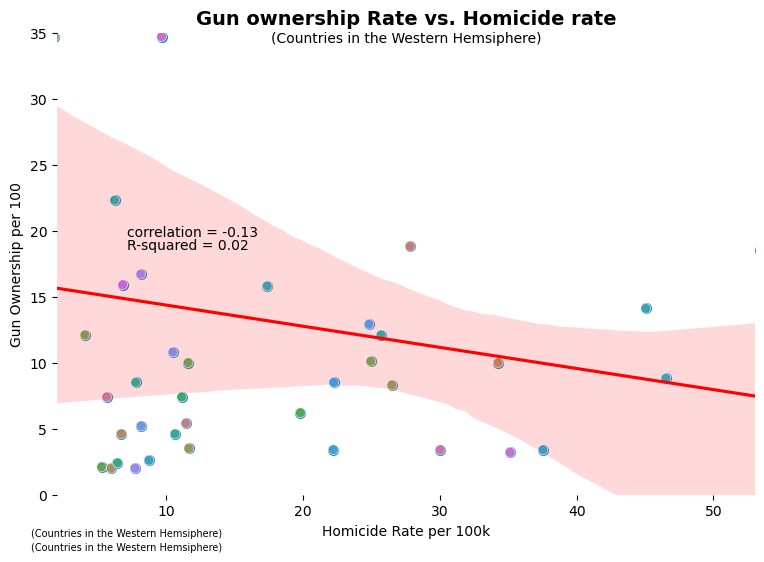

In [58]:
fig = plt.figure(figsize=(9, 6))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', data=final, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', 
hue='Country', data=final, s=50, alpha=0.7, legend=False)

ax.set(ylim=(0, 35))
ax.set(xlim=(2, 53))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership per 100')
title = ax.set_title('Gun ownership Rate vs. Homicide rate', fontsize=14)
ax.text(0.5, 0.98, '(Countries in the Western Hemsiphere)', transform=ax.transAxes, fontsize=10, ha='center')
title.set_fontweight('bold')
ax.text(0.10, -0.09, 'Homicide data: https://dataunodc.un.org/dp-intentional-homicide-victims ', transform=ax.transAxes, fontsize=7, ha='center') #add citations
ax.text(0.10, -0.12, 'Gun Ownership data: https://worldpopulationreview.com/country-rankings/gun-ownership-by-country ', transform=ax.transAxes, fontsize=7, ha='center')

sns.despine(left=True, bottom=True)

# calculate R-squared
x = final['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# add R-squared value to plot
ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.10, 0.53), xycoords='axes fraction')
# calculate Correlation
x = final['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(final['Avg Yearly Homicide Rate per 100k 2015-2020'], final['per100'])
ax.text(0.10, 0.56, f'correlation = {r_value:.2f}', transform=ax.transAxes)

plt.show()

In [17]:
merged2 = pd.merge(r, guns[['cca3', 'firearms']], left_on='Iso3_code', right_on='cca3', how='left')
final2 = merged2.dropna()

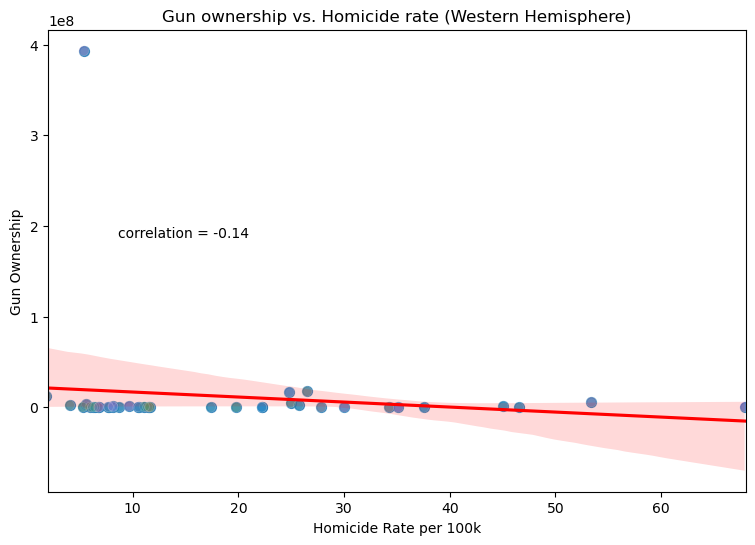

In [18]:
fig = plt.figure(figsize=(9, 6))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='firearms', data=final2, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='firearms', hue='Country', data=final2, s=50, alpha=0.2, legend=False)

# ax.set(ylim=(-10000, 200000000))
ax.set(xlim=(2, 68))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership')
ax.set(title='Gun ownership vs. Homicide rate (Western Hemisphere)')

# calculate Correlation
x = final2['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final2['firearms']
slope, intercept, r_value, p_value, std_err = stats.linregress(final2['Avg Yearly Homicide Rate per 100k 2015-2020'], final2['firearms'])
ax.text(0.10, 0.55, f'correlation = {r_value:.2f}', transform=ax.transAxes)


plt.show()

Now let's try removing the United states since the gun wonership rate is so high.

In [19]:
no_us = final.drop(37)

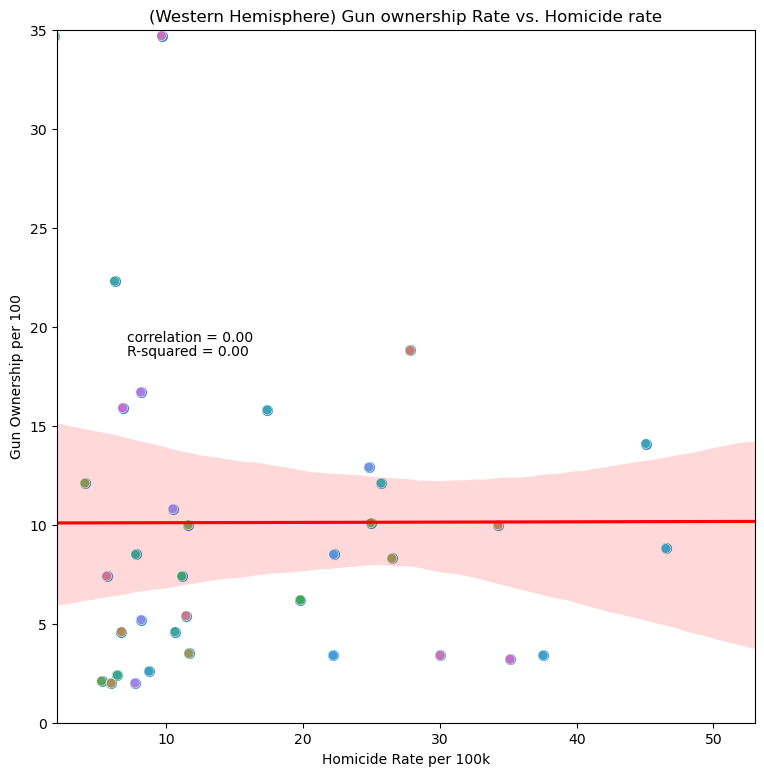

In [20]:
fig = plt.figure(figsize=(9, 9))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', data=no_us, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', 
hue='Country', data=no_us, s=50, alpha=0.7, legend=False)

ax.set(ylim=(0, 35))
ax.set(xlim=(2, 53))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership per 100')
ax.set(title='(Western Hemisphere) Gun ownership Rate vs. Homicide rate')

# calculate R-squared
x = no_us['Avg Yearly Homicide Rate per 100k 2015-2020']
y = no_us['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# add R-squared value to plot
ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.10, 0.53), xycoords='axes fraction')
# calculate Correlation
x = no_us['Avg Yearly Homicide Rate per 100k 2015-2020']
y = no_us['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(no_us['Avg Yearly Homicide Rate per 100k 2015-2020'], no_us['per100'])
ax.text(0.10, 0.55, f'correlation = {r_value:.2f}', transform=ax.transAxes)

plt.show()

Wow. dead even. Evidence seems to show that gun ownership has no real effect on homicide rate.